In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from modules.agents import TDAgent
from modules.environments import GridWorld

## Agents Comparison

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Testing grid


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Testing wall


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Testing double_wall


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Testing maze


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Testing tbone


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [25:03<12:31, 751.95s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



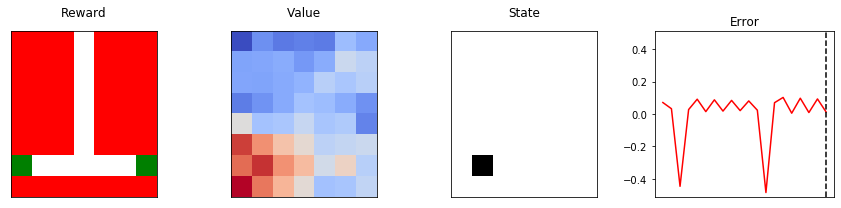

In [13]:
SALIENCE_FACTOR = 1.5
DOPAMINE_ALTERATION = 0.5

SIM_SUMMARIES = []
MAX_ITER = 1000
MAX_STEPS = 1000

for world in ['grid', 'wall', 'double_wall', 'maze', 'tbone', 'treasure_island']:
    
    print(f'Testing {world}')
    
    normal_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'normal_the_{world}'
    )
    addicted_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'addicted_the_{world}',
        salience_factor=SALIENCE_FACTOR
    )
    depleted_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'depleted_the_{world}',
        dopamine_alteration=DOPAMINE_ALTERATION
    )
    
    for agent in tqdm([normal_agent, addicted_agent, depleted_agent]):
        
        sim_summary = agent.simulate(
            max_iter=MAX_ITER, 
            verbose=200,
            max_steps=MAX_STEPS
        )
        for metric in ['steps', 'reward', 'error']:
            
            sim_summary[metric] = sim_summary[metric].astype('float')
            sim_summary[f'smooth_{metric}'] = sim_summary[metric].rolling(
                window=max(30, MAX_ITER // 10), 
                min_periods=1
            ).mean()
        
        sim_summary['world'] = world
        sim_summary['agent'] = agent.agent_tag.split('_')[0]
        SIM_SUMMARIES.append(sim_summary)
        
SIM_SUMMARIES = pd.concat(SIM_SUMMARIES, ignore_index=True)

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if __name__ == '__main__':


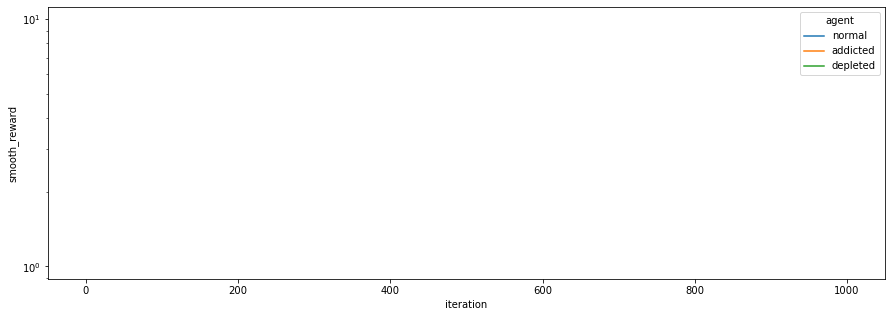

In [21]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    x='iteration',
    y='smooth_reward',
    hue='agent',
    data=SIM_SUMMARIES[SIM_SUMMARIES['world'] == 'maze']
)

In [14]:
SIM_SUMMARIES = pd.concat(SIM_SUMMARIES, ignore_index=True)

In [15]:
SIM_SUMMARIES

,iteration,steps,reward,error,smooth_steps,smooth_reward,smooth_error,world,agent
0,0.0,143.0,1.0,-23.829571,143.000000,1.000000,-23.829571,grid,normal
1,1.0,229.0,0.0,-36.632027,186.000000,0.500000,-30.230799,grid,normal
2,2.0,166.0,1.0,-22.596488,179.333333,0.666667,-27.686029,grid,normal
3,3.0,8.0,0.0,-0.260090,136.500000,0.500000,-20.829544,grid,normal
4,4.0,18.0,1.0,-1.835834,112.800000,0.600000,-17.030802,grid,normal
...,...,...,...,...,...,...,...,...,...
14009,996.0,9.0,-5.0,192.689616,11.700000,-7.530000,30.243202,tbone,addicted
14010,997.0,9.0,-5.0,193.317511,11.700000,-7.520000,30.413998,tbone,addicted
14011,998.0,14.0,-8.0,25.754136,11.750000,-7.540000,28.933271,tbone,addicted
14012,999.0,13.0,-8.0,-11.632454,11.770000,-7.540000,28.605836,tbone,addicted
